My goal for this notebook is to develop some intuition about poker, specifically for the Texas Hold'em game. 

Some things I want to know is:
1. If I'm dealt certain whole cards, should I play it or not?
2. For certain whole cards, what are my chances of improving my hands?
3. Does the game change when I play with different number of opponents?

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from time import time
import itertools
import pickle
import os.path

from Basics import Deck, test_shuffle
from win_lose import evaluate_7cards, evaluate_5cards, best_hand
from Game_Board import Test_Game

Testing basic functions and methods

In [2]:
mydeck = Deck()

In [3]:
#showing the unshuffled order of the deck
mydeck.order()

['14♣',
 '2♣',
 '3♣',
 '4♣',
 '5♣',
 '6♣',
 '7♣',
 '8♣',
 '9♣',
 '10♣',
 '11♣',
 '12♣',
 '13♣',
 '14♢',
 '2♢',
 '3♢',
 '4♢',
 '5♢',
 '6♢',
 '7♢',
 '8♢',
 '9♢',
 '10♢',
 '11♢',
 '12♢',
 '13♢',
 '14♡',
 '2♡',
 '3♡',
 '4♡',
 '5♡',
 '6♡',
 '7♡',
 '8♡',
 '9♡',
 '10♡',
 '11♡',
 '12♡',
 '13♡',
 '14♠',
 '2♠',
 '3♠',
 '4♠',
 '5♠',
 '6♠',
 '7♠',
 '8♠',
 '9♠',
 '10♠',
 '11♠',
 '12♠',
 '13♠']

In [4]:
#testing the shuffle function in Deck to see if hands are distributed equally
df_test_shuffle = test_shuffle(mydeck, 10000)

In [5]:
s_test_summary = df_test_shuffle.mean().sort_values(ascending = False).rename('avg_hand_freq')
s_test_summary

8♠     25.8726
6♠     25.7781
10♠    25.7619
8♡     25.7111
13♠    25.6960
12♣    25.6719
2♣     25.6678
9♡     25.6628
10♢    25.6511
7♠     25.6464
5♣     25.6388
8♢     25.6263
3♠     25.6162
2♡     25.6088
2♢     25.5987
11♢    25.5882
10♡    25.5817
6♣     25.5593
12♢    25.5552
14♢    25.5364
9♣     25.5328
7♡     25.5201
14♣    25.5178
3♣     25.5139
14♠    25.5052
3♡     25.5027
11♣    25.5007
14♡    25.4963
11♡    25.4933
9♠     25.4859
8♣     25.4855
5♠     25.4842
4♣     25.4763
7♣     25.4759
6♡     25.4623
9♢     25.4385
4♢     25.4305
13♢    25.4296
12♡    25.4228
10♣    25.4132
4♠     25.3972
13♣    25.3922
11♠    25.3483
2♠     25.3301
4♡     25.3076
12♠    25.2904
6♢     25.2800
13♡    25.2480
3♢     25.2406
5♢     25.2377
7♢     25.2060
5♡     25.1051
Name: avg_hand_freq, dtype: float64

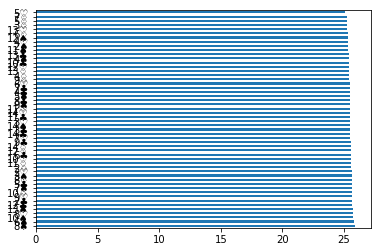

In [6]:
s_test_summary.plot(kind = 'barh')
plt.show()

Seems like the classes and the shuffle functions working okay

Trying to run some code a few times to collect some simulation data

In [ ]:
print('starting time: {}'.format(time()))
t0 = time()
winning_df = pd.DataFrame()
hands = 200000 #200000, 70091 seconds = 1168 min = 19 hrs
participants = 10
for i in range(hands):

    game_info = []
    whole_cards, comm = Test_Game('HOLDEM', participants)
    
    for player in whole_cards:
        player_cards = whole_cards[player]
        game_info.append([player, player_cards, comm])

    game_info_df = pd.DataFrame(game_info, columns = ['player', 'whole', 'comm'])
    game_info_df['combined'] = game_info_df['whole'] + game_info_df['comm']
    game_info_df['mess'] = game_info_df['combined'].apply(evaluate_7cards)
    game_info_df['best hand'] = game_info_df['mess'].apply(lambda x:x[0][0])
    game_info_df['eval'] = game_info_df['mess'].apply(lambda x:x[0][1])
    best = best_hand(list(game_info_df['mess'].apply(lambda x:x[0])))

    game_info_df['winner'] = game_info_df['eval'].apply(lambda x: 1 if best[0][1] == x else 0)
    game_info_df['round'] = i
    
    winning_df = winning_df.append(game_info_df)
    
print('took {} seconds'.format(time() - t0))
print(winning_df.head())
#seems like for every 10 games, it takes ~5 seconds to run the algo
#so 1,000,000 games should take 500,000 seconds = 8333 mins = 138 hrs = 5.7 days to run.

starting time: 1533325872.8837638


In [92]:
whole_df = pd.DataFrame({'whole': whole_list})
whole_df = whole_df['whole'].apply(sorted).apply(tuple).value_counts().to_frame()
whole_df.rename(columns = {'whole': 'whole counts'}, inplace = True)
print(whole_df.head())

           whole counts
(11♡, 7♠)          1643
(12♡, 2♡)          1637
(14♢, 9♠)          1631
(14♡, 4♣)          1630
(14♣, 4♠)          1628


In [93]:
#might want to save this thing
#should run it for 2, 5 and 10 players
winner_10p_filename = 'Data/winner_sim_200k_10p.pickle' #this is for 10p
whole_10p_filename = 'Data/whole_sim_200k_10p.pickle' #this is for 10p
#file_name = 'Data/whole_card_sim_200k_5p.pickle' #this is for 5p
#file_name = 'Data/whole_card_sim_200k_2p.pickle' #this is for 2p

In [105]:
#not sure why this didn't work with the if statement
with open(winner_10p_filename, 'wb') as handle: 
    pickle.dump(winning_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [106]:
#not sure why this didn't work with the if statement
with open(whole_10p_filename, 'wb') as handle: 
    pickle.dump(whole_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
with open(winner_10p_filename, 'rb') as handle:
    winning_df = pickle.load(handle)
with open(whole_10p_filename, 'rb') as handle:
    whole_df = pickle.load(handle)

In [110]:
print(winning_df.shape)
print(whole_df.shape)

(234139, 6)
(1326, 1)


In [107]:
all_possible_whole = pd.DataFrame({'whole':[whole for whole in list(itertools.combinations(mydeck.order(), 2))]})
print(all_possible_whole.iloc[100:106])
all_possible_whole['whole rank'] = all_possible_whole['whole'].apply(lambda x: [int(i[:-1]) for i in x]).apply(lambda x: sorted(x)).apply(tuple)
all_possible_whole['whole suit'] = all_possible_whole['whole'].apply(lambda x: [i[-1] for i in x]).apply(lambda x: sorted(x)).apply(tuple)
all_possible_whole['whole'] = all_possible_whole['whole'].apply(sorted).apply(tuple)
print(all_possible_whole.iloc[100:106])
print(all_possible_whole.shape)

         whole
100  (12♢, 8♠)
101  (2♢, 10♢)
102   (2♢, 7♡)
103  (2♢, 11♢)
104  (2♢, 14♠)
105   (2♢, 5♡)
         whole whole rank whole suit
100  (12♢, 8♠)    (8, 12)     (♠, ♢)
101  (10♢, 2♢)    (2, 10)     (♢, ♢)
102   (2♢, 7♡)     (2, 7)     (♡, ♢)
103  (11♢, 2♢)    (2, 11)     (♢, ♢)
104  (14♠, 2♢)    (2, 14)     (♠, ♢)
105   (2♢, 5♡)     (2, 5)     (♡, ♢)
(1326, 3)


In [108]:
winning_df_summary = winning_df['whole'].apply(sorted).apply(tuple).copy().value_counts().to_frame()
winning_df_summary.rename(columns = {'whole': 'winning counts'}, inplace = True)
print(winning_df_summary.head())
print(winning_df_summary.shape)

            winning counts
(14♠, 14♢)             389
(14♢, 14♣)             383
(13♠, 13♣)             367
(13♠, 13♢)             366
(12♢, 12♣)             365
(1326, 1)


Check if your algo is working...

In [111]:
winning_df_summary['winning counts'].sum()

234139

In [22]:
all_possible_whole[all_possible_whole['whole rank'] == (2, 2)]

,whole,whole rank,whole suit,counts
122,"(2♠, 2♢)","(2, 2)","(♠, ♢)",228
136,"(2♢, 2♣)","(2, 2)","(♢, ♣)",208
139,"(2♡, 2♢)","(2, 2)","(♡, ♢)",229
961,"(2♠, 2♣)","(2, 2)","(♠, ♣)",225
964,"(2♠, 2♡)","(2, 2)","(♠, ♡)",225
1237,"(2♡, 2♣)","(2, 2)","(♡, ♣)",216


In [24]:
all_possible_whole[all_possible_whole['whole rank'] == (2, 14)]
#seems like my code is working

,whole,whole rank,whole suit,counts
104,"(14♠, 2♢)","(2, 14)","(♠, ♢)",162
119,"(14♢, 2♢)","(2, 14)","(♢, ♢)",223
126,"(14♡, 2♢)","(2, 14)","(♡, ♢)",174
144,"(14♣, 2♢)","(2, 14)","(♢, ♣)",167
308,"(14♠, 2♠)","(2, 14)","(♠, ♠)",184
322,"(14♠, 2♣)","(2, 14)","(♠, ♣)",161
325,"(14♠, 2♡)","(2, 14)","(♠, ♡)",158
863,"(14♢, 2♠)","(2, 14)","(♠, ♢)",123
877,"(14♢, 2♣)","(2, 14)","(♢, ♣)",151
880,"(14♢, 2♡)","(2, 14)","(♡, ♢)",139


Develop some analysis for the DataFrame and answer the following questions:
1. what hands have very slim chance of winning? by rank and suits?
    - suits can be classified as matching or not
    - ranks can be classified as connecting, 1 gap, 2 gaps, etc
    - ranks can also be looked at by pairs, have at least an Ace, King, etc
2. what is the cutoff standard for winning percentages?
    - we can sort and plot. see if there's an elbow in the plot, for the categories that we've came up with
    - we can also answer some myths:
        - are 2, 7s the worst hands?
        - small pairs, do they always suck?
3. What ends up being the eventual winners?

some classification ideas:
1. suit:
    - same suit
    - different suit
  
2. rank:
    - pair of different sizes
    - at least a high card
    - does suit play a dramatic role?
    - gaps (0, 1, 2, 3, 4, 5+)
    
Also, how do things differ for 10 player, 5 player, and 2 player games? Is what we've found about 10 players not applicable anymore?

In [112]:
#these two functions help me come up with some classifications
def suit_cat(x):
    if x[0] == x[1]:
        return 'same'
    else:
        return 'diff'
    
def rank_cat(x):
    max_rank = max(int(x[0]), int(x[1]))
    min_rank = min(int(x[0]), int(x[1]))
    
    if max_rank == min_rank:
        status1 = 'pair'
    elif abs(max_rank - min_rank) == 1 or (max_rank == 14 and min_rank == 2):
        status1 = '1gap'
    elif abs(max_rank - min_rank) == 2 or (max_rank == 14 and min_rank == 3):
        status1 = '2gap'
    elif abs(max_rank - min_rank) == 3 or (max_rank == 14 and min_rank == 4):
        status1 = '3gap'
    elif abs(max_rank - min_rank) == 4 or (max_rank == 14 and min_rank == 5):
        status1 = '4gap'
    else:
        status1 = '5gap+' 
        
    if max_rank >= 11:
        status2 = 'high'
    elif max_rank >= 6:
        status2 = 'mid'
    else:
        status2 = 'low'
    return status2 + ' ' + status1

In [113]:
all_possible_whole['suit cat'] = all_possible_whole['whole suit'].apply(suit_cat)
all_possible_whole['rank cat'] = all_possible_whole['whole rank'].apply(rank_cat)
all_possible_whole[all_possible_whole['whole rank'] == (3, 14)]

,whole,whole rank,whole suit,suit cat,rank cat
292,"(14♠, 3♡)","(3, 14)","(♠, ♡)",diff,high 2gap
296,"(14♠, 3♠)","(3, 14)","(♠, ♠)",same,high 2gap
331,"(14♠, 3♣)","(3, 14)","(♠, ♣)",diff,high 2gap
334,"(14♠, 3♢)","(3, 14)","(♠, ♢)",diff,high 2gap
392,"(14♢, 3♡)","(3, 14)","(♡, ♢)",diff,high 2gap
399,"(14♡, 3♡)","(3, 14)","(♡, ♡)",same,high 2gap
417,"(14♣, 3♡)","(3, 14)","(♡, ♣)",diff,high 2gap
554,"(14♢, 3♠)","(3, 14)","(♠, ♢)",diff,high 2gap
561,"(14♡, 3♠)","(3, 14)","(♠, ♡)",diff,high 2gap
579,"(14♣, 3♠)","(3, 14)","(♠, ♣)",diff,high 2gap


In [114]:
all_possible_whole = all_possible_whole.merge(whole_df, how = 'outer', left_on = 'whole', right_index = True)
all_possible_whole = all_possible_whole.merge(winning_df_summary, how = 'outer', left_on = 'whole', right_index = True)
#all_possible_whole['whole occurance'] = all_possible_whole['whole counts'] / hands / participants
#all_possible_whole['whole winning %'] = all_possible_whole['winning counts'] / all_possible_whole['whole counts']
print(all_possible_whole.shape)
print(all_possible_whole.head())

(1326, 9)
       whole whole rank whole suit suit cat   rank cat  whole counts  \
0  (12♢, 9♠)    (9, 12)     (♠, ♢)     diff  high 3gap          1600   
1   (2♢, 9♠)     (2, 9)     (♠, ♢)     diff  mid 5gap+          1561   
2  (10♢, 9♠)    (9, 10)     (♠, ♢)     diff   mid 1gap          1503   
3   (7♡, 9♠)     (7, 9)     (♠, ♡)     diff   mid 2gap          1496   
4  (11♢, 9♠)    (9, 11)     (♠, ♢)     diff  high 2gap          1564   

   winning counts  whole occurance  whole winning %  
0             183         0.000800         0.114375  
1             107         0.000781         0.068546  
2             183         0.000751         0.121756  
3             189         0.000748         0.126337  
4             215         0.000782         0.137468  


In [197]:
#Average winning percentages = 11.7%
all_possible_whole['winning counts'].sum() / all_possible_whole['whole counts'].sum()

0.1170695

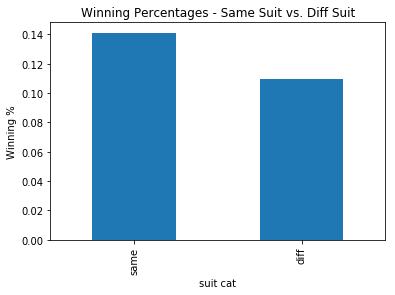

,whole counts,winning counts,whole occurance,whole winning %
suit cat,,,,
same,470580,66435,0.23529,0.141177
diff,1529420,167704,0.76471,0.109652


In [144]:
#groupby and compare suit categories to see if there's a clear difference in winning percentage. Plot if necessary
temp = all_possible_whole.groupby('suit cat')[['suit cat', 'whole counts', 'winning counts']].sum()
temp['whole occurance'] = temp['whole counts'] / hands / participants
temp['whole winning %'] = temp['winning counts'] / temp['whole counts']
temp.sort_index(ascending = False, inplace = True)
temp['whole winning %'].plot(kind = 'bar')
plt.ylabel('Winning %')
plt.title('Winning Percentages - Same Suit vs. Diff Suit')
plt.show()
temp.head()

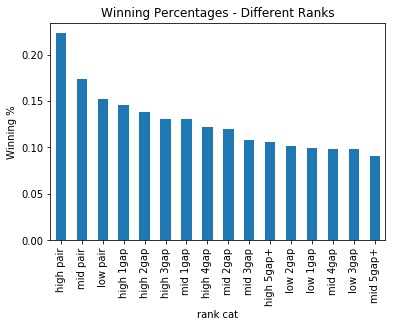

,whole counts,winning counts,whole occurance,whole winning %
rank cat,,,,
high pair,36008,8037,0.018004,0.223200
mid pair,45066,7825,0.022533,0.173634
low pair,36235,5496,0.018118,0.151677
high 1gap,120804,17604,0.060402,0.145724
high 2gap,120253,16676,0.060127,0.138674
high 3gap,121204,15886,0.060602,0.131068
mid 1gap,120455,15694,0.060228,0.130289
high 4gap,121094,14799,0.060547,0.122211
mid 2gap,120927,14522,0.060464,0.120089


In [154]:
#groupby and compare rank categories to see if there's a clear difference in winning percentage. Plot if necessary
temp = all_possible_whole.groupby('rank cat')[['rank cat', 'whole counts', 'winning counts']].sum()
temp['whole occurance'] = temp['whole counts'] / hands / participants
temp['whole winning %'] = temp['winning counts'] / temp['whole counts']
temp.sort_values(by = 'whole winning %', ascending = False, inplace = True)
temp['whole winning %'].plot(kind = 'bar')
plt.ylabel('Winning %')
plt.title('Winning Percentages - Different Ranks')
plt.show()
temp.head(20)

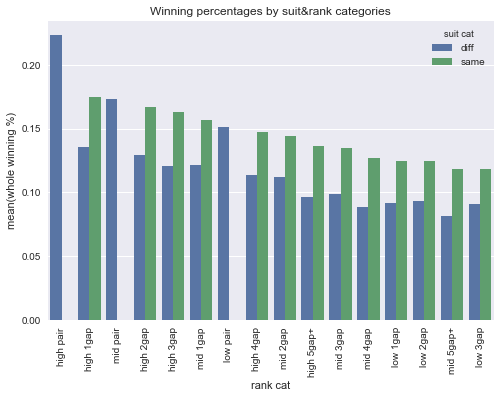

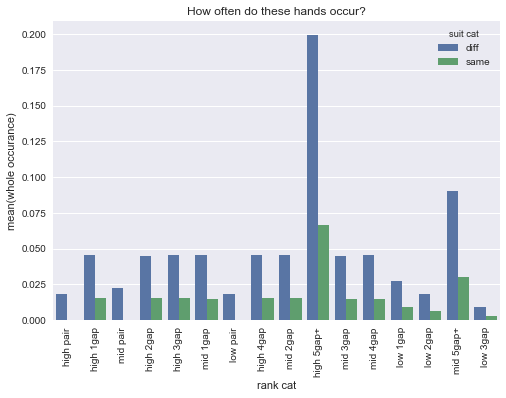

In [169]:
#let's use seaborn to give us a more definitive answer about ranks and suits
temp = all_possible_whole.groupby(['rank cat', 'suit cat'])[['rank cat', 'suit cat', 'whole counts', 'winning counts']].sum().reset_index()
temp['whole occurance'] = temp['whole counts'] / hands / participants
temp['whole winning %'] = temp['winning counts'] / temp['whole counts']
temp.sort_values(by = 'whole winning %', ascending = False, inplace = True)
sns.barplot(data = temp, x = 'rank cat', y = 'whole winning %', hue = 'suit cat')
plt.xticks(rotation = 90)
plt.title('Winning percentages by suit&rank categories')
plt.show()
sns.barplot(data = temp, x = 'rank cat', y = 'whole occurance', hue = 'suit cat')
plt.xticks(rotation = 90)
plt.title('How often do these hands occur?')
plt.show()

Within the top winning rank & suit combination, let's actually look at the cards winning percentages and occurances:
1. high pair
2. high 1gap same suit
3. mid pair
4. high 2gap same suit
5. high 3gap same suit
6. mid 1gap same suit
7. low pair
8. high 4gap same suit
9. mid 2gap same suit
10. high 5gap+ same suit (~14% chances of winning)

In [182]:
good_whole_criteria = ((all_possible_whole['rank cat'] == 'high pair') | (all_possible_whole['rank cat'] == 'mid pair') | 
                       (all_possible_whole['rank cat'] == 'low pair') | ((all_possible_whole['suit cat'] == 'same') & 
                                                                         ((all_possible_whole['rank cat'] == 'high 1gap') |
                                                                          (all_possible_whole['rank cat'] == 'high 2gap') |
                                                                          (all_possible_whole['rank cat'] == 'high 3gap') |
                                                                          (all_possible_whole['rank cat'] == 'high 4gap') |
                                                                          (all_possible_whole['rank cat'] == 'high 5gap+') |
                                                                          (all_possible_whole['rank cat'] == 'mid 1gap') |
                                                                          (all_possible_whole['rank cat'] == 'mid 2gap'))))
all_possible_whole[good_whole_criteria].head()

,whole,whole rank,whole suit,suit cat,rank cat,whole counts,winning counts,whole occurance,whole winning %
5,"(14♠, 9♠)","(9, 14)","(♠, ♠)",same,high 5gap+,1511,249,0.000755,0.164792
10,"(12♠, 9♠)","(9, 12)","(♠, ♠)",same,high 3gap,1487,230,0.000744,0.154674
15,"(10♠, 9♠)","(9, 10)","(♠, ♠)",same,mid 1gap,1503,267,0.000751,0.177645
17,"(13♠, 9♠)","(9, 13)","(♠, ♠)",same,high 4gap,1623,209,0.000812,0.128774
22,"(7♠, 9♠)","(7, 9)","(♠, ♠)",same,mid 2gap,1529,234,0.000764,0.153041


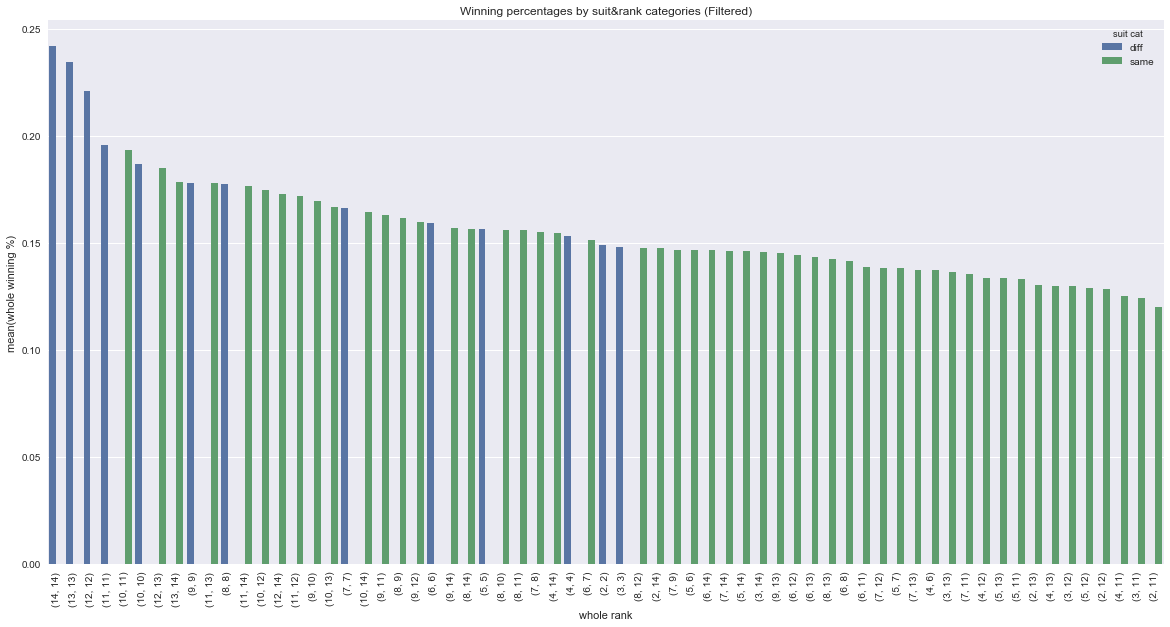

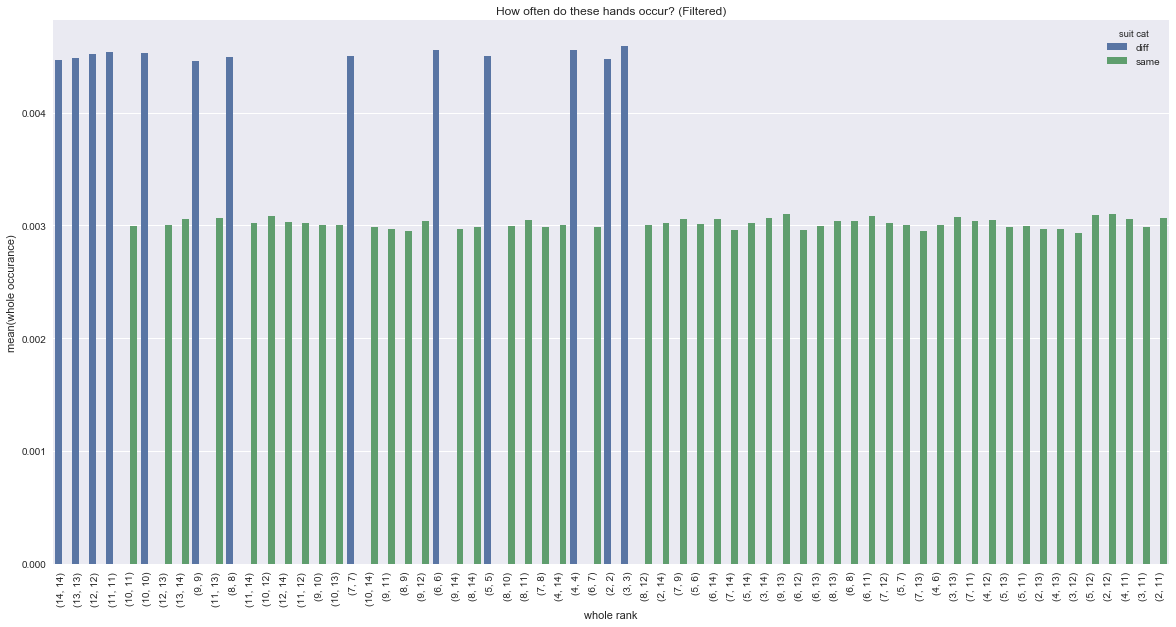

,suit cat,whole rank,whole counts,winning counts,whole occurance,whole winning %
12,diff,"(14, 14)",8939,2162,0.004469,0.241862
11,diff,"(13, 13)",8967,2105,0.004483,0.234750
10,diff,"(12, 12)",9030,1994,0.004515,0.220819
9,diff,"(11, 11)",9072,1776,0.004536,0.195767
55,same,"(10, 11)",5997,1159,0.002999,0.193263
8,diff,"(10, 10)",9056,1693,0.004528,0.186948
62,same,"(12, 13)",6009,1112,0.003004,0.185056
64,same,"(13, 14)",6109,1089,0.003054,0.178262
7,diff,"(9, 9)",8913,1587,0.004457,0.178055
60,same,"(11, 13)",6127,1090,0.003063,0.177901


In [200]:
temp = all_possible_whole[good_whole_criteria].groupby(['suit cat', 'whole rank'])[['whole rank', 'suit cat', 'whole counts', 'winning counts']].sum().reset_index()
temp['whole occurance'] = temp['whole counts'] / hands / participants
temp['whole winning %'] = temp['winning counts'] / temp['whole counts']

temp.sort_values(by = 'whole winning %', ascending = False, inplace = True)

plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(data = temp, x = 'whole rank', y = 'whole winning %', hue = 'suit cat')
plt.xticks(rotation = 90)
plt.title('Winning percentages by suit&rank categories (Filtered)')
plt.show()

plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(data = temp, x = 'whole rank', y = 'whole occurance', hue = 'suit cat')
plt.xticks(rotation = 90)
plt.title('How often do these hands occur? (Filtered)')
plt.show()

temp.head(20)

Seems like the must-play-hands are:
    1. 20% and up: As, Ks, Qs (these double the average winning percentages)
    2. 18-20%: Js, (10, J same), 10s, (K, Q same)
    3. 17.5-18%: (A, K same), 9s, (K, J same), 8s, (A, J same)
    4. 17-17.5%: (10, 12 same), (A, Q same), (Q, J same)
    5. 17% and below: (9, 10 same), (10, K same) 7s, (10, A same), (9, J same)
    
Let's also look at some of the most occuring hands and their winning percentages

In [195]:
temp.sort_values(by = 'whole occurance', ascending = False, inplace = True)
temp.head(20)

,suit cat,whole rank,whole counts,winning counts,whole occurance,whole winning %
50,diff,"(6, 10)",18358,1854,0.009179,0.100991
67,diff,"(8, 12)",18356,2024,0.009178,0.110264
38,diff,"(5, 7)",18345,1988,0.009173,0.108367
35,diff,"(4, 14)",18330,1934,0.009165,0.105510
11,diff,"(2, 13)",18327,1628,0.009163,0.088831
41,diff,"(5, 10)",18311,1652,0.009156,0.090219
42,diff,"(5, 11)",18303,1630,0.009151,0.089056
75,diff,"(9, 14)",18275,2085,0.009137,0.114090
84,diff,"(11, 14)",18263,2368,0.009131,0.129661
12,diff,"(2, 14)",18252,1801,0.009126,0.098674


Also look at the worst hands and their occurances

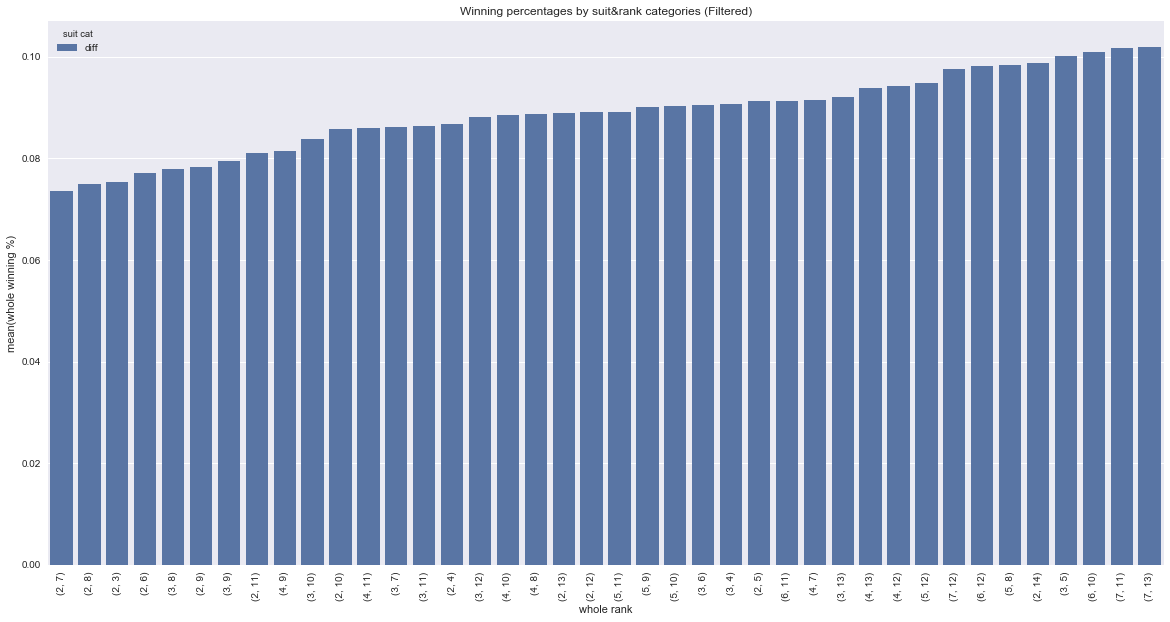

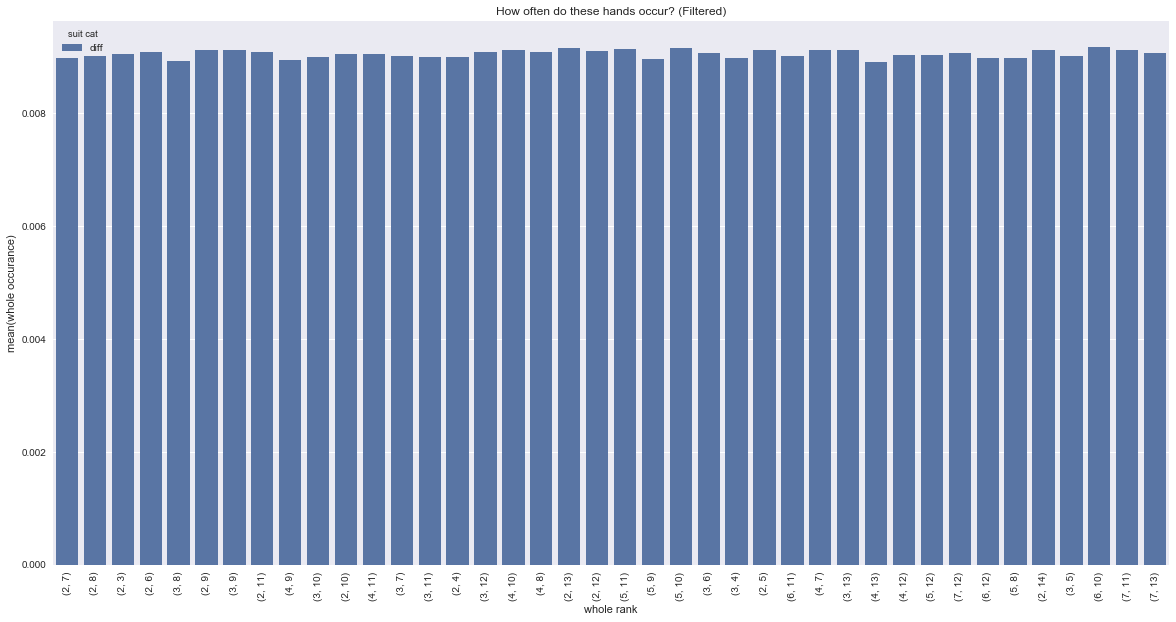

,suit cat,whole rank,whole counts,winning counts,whole occurance,whole winning %
5,diff,"(2, 7)",17982,1322,0.008991,0.073518
6,diff,"(2, 8)",18037,1353,0.009019,0.075012
1,diff,"(2, 3)",18099,1363,0.009050,0.075308
4,diff,"(2, 6)",18166,1401,0.009083,0.077122
18,diff,"(3, 8)",17874,1391,0.008937,0.077823
7,diff,"(2, 9)",18243,1427,0.009122,0.078222
19,diff,"(3, 9)",18249,1450,0.009125,0.079456
9,diff,"(2, 11)",18165,1473,0.009083,0.081090
30,diff,"(4, 9)",17878,1456,0.008939,0.081441
20,diff,"(3, 10)",18004,1510,0.009002,0.083870


In [206]:
temp = all_possible_whole.groupby(['suit cat', 'whole rank'])[['whole rank', 'suit cat', 'whole counts', 'winning counts']].sum().reset_index()
temp['whole occurance'] = temp['whole counts'] / hands / participants
temp['whole winning %'] = temp['winning counts'] / temp['whole counts']

temp.sort_values(by = 'whole winning %', ascending = True, inplace = True)

plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(data = temp.head(40), x = 'whole rank', y = 'whole winning %', hue = 'suit cat')
plt.xticks(rotation = 90)
plt.title('Winning percentages by suit&rank categories (Filtered)')
plt.show()

plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(data = temp.head(40), x = 'whole rank', y = 'whole occurance', hue = 'suit cat')
plt.xticks(rotation = 90)
plt.title('How often do these hands occur? (Filtered)')
plt.show()

temp.head(20)

Some of the worst hands, mind that all these are diff suits:
1. < 8%: (2, 7), (2, 8), (2, 3), (2, 6), (3, 8), (2, 9), (3, 9). All these are 5+ gapers with 2 or 3
2. 8-8.5%: (2, J), (4, 9), (3, 10). It's surprising that there's J involved
3. 8.5%+ :(2, 10), (4, J), (3, 7), (3, J), (2, 4), (3, Q), (4, 10), (4, 8), (2, K), (2, Q). We are beginning to see Q and Ks.
4. The worst hand with an A is (2, A), with 9.86% winning percentage

In [212]:
i = 0
notfound = True
while notfound:
    if 14 in list(temp['whole rank'].iloc[i]):
        notfound = False
        print('worst hand with an ace is {}, winning % is {}'.format(temp['whole rank'].iloc[i], temp['whole winning %'].iloc[i]))
    i += 1

worst hand with an ace is (2, 14), winning % is 0.09867411790488713


In [213]:
i = 0
notfound = True
while notfound:
    if list(temp['whole rank'].iloc[i])[0] == list(temp['whole rank'].iloc[i])[1]:
        notfound = False
        print('worst hand with a pair is {}, winning % is {}'.format(temp['whole rank'].iloc[i], temp['whole winning %'].iloc[i]))
    i += 1

worst hand with a pair is (3, 3), winning % is 0.1482612013517933


In [222]:
winning_df['cls'] = winning_df['eval'].apply(lambda x: x[1])

winning_df.groupby('cls')[['cls', 'whole']].count().head(20)

,cls,whole
cls,,
1 Pair,17699,17699
2 Pairs,51437,51437
3 of a Kind,36841,36841
4 of a Kind,3044,3044
Flush,28553,28553
Full House,38746,38746
High,1,1
Royal flush,53,53
Straight,57216,57216


Answer the following questions:
    
1. what hands have very slim chance of winning? by rank and suits?
    - suits can be classified as matching or not
        - diff suits generally have low winning percentages
        - same suits occur less frequently
        - note that the pairs have different suits
    - ranks can be classified as connecting, 1 gap, 2 gaps, etc
        - those that have a 2, and not connection (5+ gaps) have the lowest chances of winning
        - surprisingly, those with high card (A, K, Q, J) + 2, 3, 4 are pretty bad as well (also 5+ gaps)
    - ranks can also be looked at by pairs, have at least an Ace, King, etc
        - Pairs are great, the worst pair is (3, 3), with 14.8% chance of winning. Well above the average
        - those that are high and have low gaps do well. They key is suited.
        
2. what is the cutoff standard for winning percentages?
    - we can sort and plot. see if there's an elbow in the plot, for the categories that we've came up with
        - there's sort of an elbow at Js. However, it's impossible to only play As, Ks, Qs and Js. 
        - the key again is to see what's tolerable compared to average. again, suited are much better.
    - we can also answer some myths:
        - are 2, 7s the worst hands? yes
        - small pairs, do they always suck? actually they are not that bad. much better than (2, A), for instance.
3. What ends up being the eventual winners?
    - what are the eventual winners and their whole?
        - 
    - how often do these winners appear?
    - what type of hands and what are their chances of becoming eventual winners
    - 

In [115]:
winning_df['whole suit'].count()

whole suit    11663
dtype: int64

I need a function that tells me the possibilities with the whole and the community, namely the outs I have for improving my current position.

When it's whole cards, we'll look at the winning percentages by previous experiences. After the flop, we'll look at the best possible hands that would improve current position:
0. identify itself by using the 5 cards we already have.
1. add two blanks, iterate through all the possiblities:
    - look at those with the same score and above
    - list out all the possible cards that would improve position.
After the turn:
0. identify itself by using the 6 cards we already have.
1. add 1 blanks, iterate through all the possibilities:
    - look at those with the same score and above
    - list out all the possible cards that would improve position.
After the river:
0. identify itself by using the 7 cards we already have.

I also need a function that compares hands on the game board if all cards are visible. This will come from one player's POV, and evaluate hands against his opponent(s).